## Problem Statement
The goal of this project is to predict house prices based on features such as
house size, number of bedrooms, and age of the house.


In [1]:
import pandas as pd 

dataset = pd.read_csv("house_data.csv")
dataset.head()

,Size_sqft,Bedrooms,Age,Price
0,800,1,10.0,50000
1,900,2,8.0,60000
2,1000,2,5.0,70000
3,1100,3,7.0,80000
4,1200,3,NaN,90000


The dataset contains numerical features related to house characteristics.

Initial inspection shows missing values that must be handled.


In [3]:
dataset["Age"] = dataset["Age"].fillna(dataset["Age"].mean())

Missing values in the Age column were filled using the mean to preserve data.


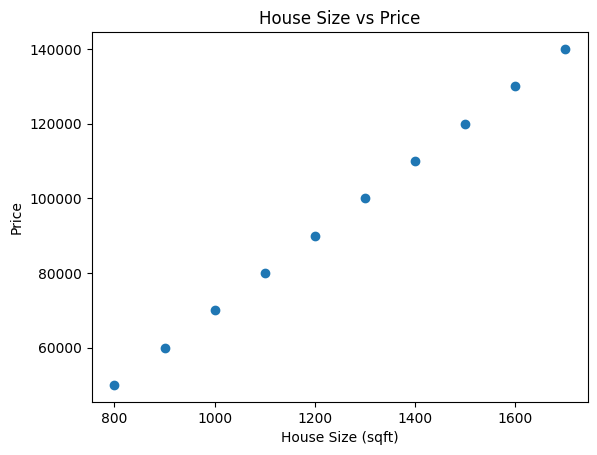

In [4]:
import matplotlib.pyplot as plt

plt.scatter(dataset["Size_sqft"], dataset["Price"])
plt.xlabel("House Size (sqft)")
plt.ylabel("Price")
plt.title("House Size vs Price")
plt.show()

The scatter plot shows a strong positive relationship between house size and price.

This suggests that size is a key predictor.


In [5]:
x = dataset.iloc[:,:-1]
y = dataset["Price"]

Multiple relevant features are selected to predict house price.


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x_train,x_test,y_train,y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [7]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [12]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(x_test_scaled)
print("MSE: ", mean_squared_error(y_test,y_pred))
print("R2: ", r2_score(y_test, y_pred))

MSE:  2.117582368135751e-22
R2:  1.0


The model achieves a strong R² score, indicating good predictive performance.


In [13]:
coeff_df = pd.DataFrame({
    "Feature" : x.columns ,
    "Coefficient" : model.coef_
})
coeff_df

,Feature,Coefficient
0,Size_sqft,2.692582e+04
1,Bedrooms,-1.820268e-12
2,Age,8.397109e-13


House size has the highest impact on price, followed by bedrooms and age.

This aligns with real-world expectations.


# CONCLUSION
This project demonstrates a complete machine learning pipeline from raw data
to model evaluation. Proper data cleaning, feature selection, and scaling
played a key role in achieving good model performance.
